In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp
import scipy.constants as c
from scipy import stats

%matplotlib inline
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)

# Messdaten

## Volumenbestimmung in cm$^3$

In [25]:
# Rezipient für beide
drez1 = ufloat(15.2, 0.7)
lrez1 = ufloat(39.1, 0.5)
Vrez1 = np.pi * lrez1 * drez1**2 / 4

drez2 = ufloat(2.2, 0.2)
lrez2 = ufloat(7.2, 0.5)
Vrez2 = np.pi * lrez2 * drez2**2 / 4

drez3 = ufloat(3.2, 0.2)
lrez3 = ufloat(8.1, 0.5)
Vrez3 = np.pi * lrez3 * drez3**2 / 4

drez4 = ufloat(4.0, 0.2)
lrez4 = ufloat(12.9, 0.5)
Vrez4 = np.pi * lrez4 * drez4**2 / 4

VRez = (Vrez1 + Vrez2 + Vrez3 + Vrez4) / 1000
print("V-Rezipient = ", VRez)



# Schlauch für beide
dS = ufloat(3.9, 0.5)
lS = ufloat(39, 0.5)
VS = np.pi * lS * dS**2 / 4000
print("V-Schlauch = ", VS)



# Nadelventil
dnadel = ufloat(1.0, 0.5)
lnadel = ufloat(2.5, 0.5)
Vnadel = np.pi * lnadel * dnadel**2 / 4000
print("V-nadel =", Vnadel)

# Kugelventil
dkugel = ufloat(1.6, 0.5)
lkugel = ufloat(7.4, 0.2)
Vkugel = np.pi * lkugel * dkugel**2 / 4000
print("V-kugel =", Vkugel)

# T-Stück für das Nadelventil
dnadelT1 = ufloat(4, 0.2)
lnadelT1 = ufloat(10, 0.2)
VnadelT1 = np.pi * lnadelT1 * dnadelT1**2 / 4

dnadelT2 = ufloat(1, 0.2)
lnadelT2 = ufloat(2.4, 0.5)
VnadelT2 = np.pi * lnadelT2* dnadelT2**2 / 4

VnadelT = (VnadelT1 + VnadelT2) / 1000
print("V-nadelT =", VnadelT)
VNadel = Vkugel + Vnadel + VnadelT


# T-Stück (von der Turbopumpe) für beide
dturbo1 = ufloat(4, 0.5)
lturbo1 = ufloat(16, 0.5)
Vturbo1 = np.pi * lturbo1 * dturbo1**2 / 4

dturbo2 = ufloat(3.9, 0.5)
lturbo2 = ufloat(4.5, 0.5)
Vturbo2 = np.pi * lturbo2 * dturbo2**2 / 4

VTurbo = (Vturbo1 + Vturbo2) / 1000
print("V-Turbo = ", VTurbo)



# T-Stück (pirani) nur für Drehschieberpumpe
dpirani1 = ufloat(1.3, 0.2)
lpirani1 = ufloat(8, 0.2)
Vpirani1 = np.pi * lpirani1 * dpirani1**2 / 4

dpirani2 = ufloat(1.2, 0.2)
lpirani2 = ufloat(3.3, 0.5)
Vpirani2 = np.pi * lpirani2 * dpirani2**2 / 4

VPirani = (Vpirani1 + Vpirani2) / 1000
print("V-Pirani = ", VPirani)



# T-Stück (anschluss) nur für Drehschieberpumpe
dan1 = ufloat(4, 0.2)
lan1 = ufloat(13, 0.2)
Van1 = np.pi * lan1 * dan1**2 / 4

dan2 = ufloat(1.6, 0.2)
lan2 = ufloat(2.5, 0.5)
Van2 = np.pi * lan2 * dan2**2 / 4

VAn = (Van1 + Van2) / 1000
print("V-Anschluss = ", VAn)



# Gesamtvolumen in l für die Drehschieberpumpe
VD = VRez + VS + VNadel + VTurbo + VPirani + VAn
print("VD = ", VD)

VT = VRez + VS + VNadel + VTurbo
print("VT = ", VT)

V-Rezipient =  7.3+/-0.7
V-Schlauch =  0.47+/-0.12
V-nadel = 0.0020+/-0.0020
V-kugel = 0.015+/-0.009
V-nadelT = 0.128+/-0.013
V-Turbo =  0.25+/-0.05
V-Pirani =  0.014+/-0.004
V-Anschluss =  0.168+/-0.017
VD =  8.4+/-0.7
VT =  8.2+/-0.7


## Daten für die Drehschieberpumpe

In [26]:
VD = ufloat(8.4, 0.7)

# Anfangsdruck p0 = 1013 mbar
p0D = ufloat(1013, 202.6)

# Enddruck pe = 0.02 mbar
peD = ufloat(0.02, 0.004)

# Daten für die p(t)-Kurve der Drehschieberpumpe
p_D, t_1D, t_2D, t_3D, t_4D, t_5D = np.genfromtxt('data/p(t)-Kurve-Drehschieberpumpe.txt', unpack=True)

# Daten für die Leckratenmessung der Drehschieberpumpe
# Anfangsdruck p_g = 0.1 mbar
p_gD1 = 0.1
pD1, t1D1, t2D1, t3D1 = np.genfromtxt('data/Leckratenmessung-0.1mbar-Drehschieberpumpe.txt', unpack=True)

# Anfangsdruck p_g = 0.4 mbar
p_gD2 = 0.4
pD2, t1D2, t2D2, t3D2 = np.genfromtxt('data/Leckratenmessung-0.4mbar-Drehschieberpumpe.txt', unpack=True)

# Anfangsdruck p_g = 0.6 mbar
p_gD3 = 0.6
pD3, t1D3, t2D3, t3D3 = np.genfromtxt('data/Leckratenmessung-0.6mbar-Drehschieberpumpe.txt', unpack=True)

# Anfangsdruck p_g = 0.8 mbar
p_gD4 = 0.8
pD4, t1D4, t2D4, t3D4 = np.genfromtxt('data/Leckratenmessung-0.8mbar-Drehschieberpumpe.txt', unpack=True)

# Anfangsdruck p_g = 1.0 mbar
p_gD5 = 1.0
pD5, t1D5, t2D5, t3D5 = np.genfromtxt('data/Leckratenmessung-1.0mbar-Drehschieberpumpe.txt', unpack=True)


## Daten für die Turbopumpe

In [27]:
VT = ufloat(8.2, 0.7)

# Anfangsdruck p0 = 5 * 10^-3 mbar
p0T = ufloat(5 * 10**(-3), 5 * 10**(-4))

# Enddruck pe = 2 * 10^-5 mbar
peT = ufloat(1.9 * 10**(-5), 1.9 * 10**(-6))

# Daten für die p(t)-Kurve der Drehschieberpumpe
p_T, t_1T, t_2T, t_3T, t_4T, t_5T, t_6T = np.genfromtxt('data/p(t)-Kurve-Turbopumpe.txt', unpack=True)
p_T *= 10**(-4)

# Daten für die Leckratenmessung der Drehschieberpumpe
# Anfangsdruck p_g = 5 * 10^-5 mbar
p_gT1 = 5 * 10**(-5)
pT1, t1T1, t2T1, t3T1 = np.genfromtxt('data/Leckratenmessung-5mbar-Turbopumpe.txt', unpack=True)
pT1 *= 10**(-4)

# Anfangsdruck p_g = 10 * 10^-5 mbar
p_gT2 = 10 * 10**(-5)
pT2, t1T2, t2T2, t3T2 = np.genfromtxt('data/Leckratenmessung-10mbar-Turbopumpe.txt', unpack=True)
pT2 *= 10**(-4)

# Anfangsdruck p_g = 15 * 10^-5 mbar
p_gT3 = 15 * 10**(-5)
pT3, t1T3, t2T3, t3T3 = np.genfromtxt('data/Leckratenmessung-15mbar-Turbopumpe.txt', unpack=True)
pT3 *= 10**(-4)

# Anfangsdruck p_g = 20 * 10^-5 mbar
p_gT4 = 20 * 10**(-5)
pT4, t1T4, t2T4, t3T4 = np.genfromtxt('data/Leckratenmessung-20mbar-Turbopumpe.txt', unpack=True)
pT4 *= 10**(-4)

# Funktionen

In [43]:
def f(x, a, b):
    return a * x + b

def deltaS(V, m, deltam):
    return np.sqrt( (m*V.s)**2 + (V.n*deltam)**2 )

## Funktion zur Bestimmung des Saugvermögens S aus der Leckrate

In [29]:
def Leckrate(p, p_g, err, t1, t2, t3, V, name):
    n = len(p)
    t = np.zeros(n)
    terr = np.zeros(n)
        
    # Mittelwert und Fehler der Zeit
    for i in range(n):
        t[i] = (t1[i] + t2[i] + t3[i])/3
        terr[i] = stats.sem([t1[i], t2[i], t3[i]])
        
    # Fehler vom Druck
    perr = p * err
    p_g = ufloat(p_g, p_g*err)
    
    # lineare Regression
    params, covariance = curve_fit(f, t, p, sigma=perr)
    errors = np.sqrt(np.diag(covariance))
    
    # plottet das ganze
    x = np.linspace(t[0]-20, t[-1]+20, 20)
    plt.errorbar(t, p, xerr=terr, yerr=perr, c='blue', fmt='o', label='Messdaten')
    plt.plot(x, f(x, *params), c='red', label='lineare Regression')
    plt.xlabel(r'$t$ / s')
    plt.ylabel(r'$p$ / mbar')
    plt.xlim(t[0]-20, t[-1]+20)
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.savefig("pictures/Leck-"+name+".pdf")
    plt.close()
    
    # Berechnung des Saugvermögens aus der Steigung
    S = V.n * params[0] / p_g.n
    deltaS = math.sqrt( (params[0]/p_g.n)**2*(V.s)**2 + ((V.n*params[0])/(p_g.n)**2)**2*(p_g.s)**2 + (V.n/p_g.n)**2*(errors[0])**2 )
    
    print("Druck p[mbar] =", p)
    print("Fehler vom Druck perr =", perr)
    print("Mittelwert der Zeit t[s] =", t.round(3), terr.round(3))
    print("Parameter a und b =", params, " +- ", errors)
    print("Saugvermögen S[l/s] =", S, "+-", deltaS)
    print(" ")
    

## Funktion zur Bestimmung des Saugvermögens S aus der p(t)-Kurve für die Drehschieberpumpe

In [56]:
def ptKurveDreh(p, p0, pe, t1, t2, t3, t4, t5, V, err=0.2):
    n = len(p)
    t = np.zeros(n)
    terr = np.zeros(n)

    # Mittelwert und Fehler der Zeit
    for i in range(n):
        t[i] = (t1[i] + t2[i] + t3[i] + t4[i] + t5[i]) / 5
        terr[i] = stats.sem([t1[i], t2[i], t3[i], t4[i], t5[i]])
    print("t = ", t)
    print("terr = ", terr)

    # Fehler vom Druck
    perr = p * err
    
    # y-Achse
    logP = np.log( (p-pe.n) / (p0.n-pe.n) )
    print("y-Achse des Plottes =", logP)
    
    # Fehler von logP
    deltalogP = np.sqrt( (perr / (pe.n-p))**2 
                        + (p0.s / (p0.n-pe.n))**2 
                        + (((p0.n-p)*pe.s) / ((pe.n-p0.n)*(pe.n-p)))**2 ) 
    print("Fehler der y-Achse =", deltalogP)
    
    # Bereiche bestimmen und lineare Regression
    t_1 = t[0:3]
    terr_1 = terr[0:3]
    perr_1 = deltalogP[0:3]
    logP_1 = logP[0:3]
    params_1, covariance_1 = curve_fit(f, t_1, logP_1)
    errors_1 = np.sqrt(np.diag(covariance_1))
    t1 = np.linspace(t_1[0]-10, t_1[-1]+10)
    print("Parameter a und b =", params_1, "+-", errors_1)
    
    t_2 = t[3:9]
    terr_2 = terr[3:9]
    perr_2 = deltalogP[3:9]
    logP_2 = logP[3:9]
    params_2, covariance_2 = curve_fit(f, t_2, logP_2)
    errors_2 = np.sqrt(np.diag(covariance_2))
    t2 = np.linspace(t_2[0]-10, t_2[-1]+10)
    print("Parameter a und b =", params_2, "+-", errors_2)
    
    t_3 = t[9:14]
    terr_3 = terr[9:14]
    perr_3 = deltalogP[9:14]
    logP_3 = logP[9:14]
    params_3, covariance_3 = curve_fit(f, t_3, logP_3)
    errors_3 = np.sqrt(np.diag(covariance_3))
    t3 = np.linspace(t_3[0]-10, t_3[-1]+10)
    print("Parameter a und b =", params_3, "+-", errors_3)
    
    t_4 = t[14:18]
    terr_4 = terr[14:18]
    perr_4 = deltalogP[14:18]
    logP_4 = logP[14:18]
    params_4, covariance_4 = curve_fit(f, t_4, logP_4)
    errors_4 = np.sqrt(np.diag(covariance_4))
    t4 = np.linspace(t_4[0]-10, t_4[-1]+10)
    print("Parameter a und b =", params_4, "+-", errors_4)
    
    # Saugvermögen
    deltaS1 = deltaS(VD, params_1[0], errors_1[0])
    S1 = ufloat(-params_1[0]*V.n, deltaS1)
    print("S1 =", S1)
    deltaS2 = deltaS(VD, params_2[0], errors_2[0])
    S2 = ufloat(-params_2[0]*V.n, deltaS2)
    print("S2 =", S2)
    deltaS3 = deltaS(VD, params_3[0], errors_3[0])
    S3 = ufloat(-params_3[0]*V.n, deltaS3)
    print("S3 =", S3)
    deltaS4 = deltaS(VD, params_4[0], errors_4[0])
    S4 = ufloat(-params_4[0]*V.n, deltaS4)
    print("S4 =", S4)
    
    
    # plottet alles
    plt.errorbar(t_1, logP_1, xerr=terr_1, yerr=perr_1, c='green', fmt='.', label='Messwerte Gerade 1')
    plt.plot(t1, f(t1, *params_1), c='green', label='lineare Regression Gerade 1')
    
    plt.errorbar(t_2, logP_2, xerr=terr_2, yerr=perr_2, c='blue', fmt='.', label='Messwerte Gerade 2')
    plt.plot(t2, f(t2, *params_2), c='blue', label='lineare Regression Gerade 2')
    
    plt.errorbar(t_3, logP_3, xerr=terr_3, yerr=perr_3, c='yellow', fmt='.', label='Messwerte Gerade 3')
    plt.plot(t3, f(t3, *params_3), c='yellow', label='lineare Regression Gerade 3')
    
    plt.errorbar(t_4, logP_4, xerr=terr_4, yerr=perr_4, c='red', fmt='.', label='Messwerte Gerade 4')
    plt.plot(t4, f(t4, *params_4), c='red', label='lineare Regression Gerade 4')
    
    plt.xlabel(r'$t$ / s')
    plt.ylabel(r'$\ln\left(\frac{p-p_e}{p_0-p_e}\right)$')
    plt.xlim(t[0]-20, t[-1]+20)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.grid()
    plt.tight_layout()
    plt.savefig("pictures/pt-Kurve-Drehschieberpumpe.pdf", bbox_inches='tight')

t =  [  16.    26.    32.4   40.    47.2   49.6   52.8   57.    63.6   70.8
   73.6   77.8   84.4   96.8  108.4  114.   124.4  155.2]
terr =  [ 0.31622777  0.31622777  0.50990195  0.4472136   0.37416574  0.4
  0.37416574  0.31622777  0.24494897  0.37416574  0.4         0.48989795
  0.50990195  0.37416574  0.50990195  0.31622777  0.50990195  2.596151  ]
y-Achse des Plottes = [ -2.31568159  -2.82664059  -3.23227243  -3.92591999  -4.62006867
  -4.84371335  -5.13223119  -5.53936994  -6.23755492  -6.94085447
  -7.16911312  -7.46537894  -7.88823579  -8.63545019  -9.44638041
  -9.73406248 -10.13952759 -10.83267477]
Fehler der y-Achse = [ 0.2828738   0.28289267  0.28291628  0.28298717  0.28312933  0.2832006
  0.28331966  0.28355882  0.28428473  0.2857753   0.28654043  0.28784591
  0.29057465  0.29979651  0.32403886  0.33993618  0.37416679  0.48989795]
Parameter a und b = [-0.05546869 -1.41590814] +- [ 0.00332188  0.08537858]
Parameter a und b = [-0.09726175 -0.02137723] +- [ 0.00136012  0.0710

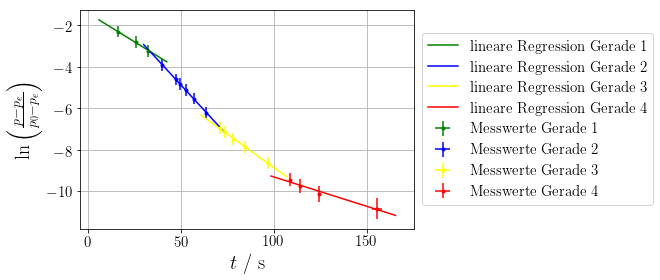

In [57]:
ptKurveDreh(p_D, p0D, peD, t_1D, t_2D, t_3D, t_4D, t_5D, VD)

## Funktion zur Bestimmung des Saugvermögens S aus der p(t)-Kurve für die Turbopumpe

In [61]:
def ptKurveTurbo(p, p0, pe, t1, t2, t3, t4, t5, t6, V, err=0.1):
    n = len(p)
    t = np.zeros(n)
    terr = np.zeros(n)

    # Mittelwert und Fehler der Zeit
    for i in range(n):
        t[i] = (t1[i] + t2[i] + t3[i] + t4[i] + t5[i] + t6[i]) / 6
        terr[i] = stats.sem([t1[i], t2[i], t3[i], t4[i], t5[i], t6[i]])
    print("t = ", t)
    print("terr = ", terr)
    
    # Fehler vom Druck
    perr = p * err
    
    # y-Achse
    logP = np.log( (p-pe.n) / (p0.n-pe.n) )
    print("y-Achse des Plottes =", logP)
    
    # Fehler von logP
    deltalogP = np.sqrt( (perr / (pe.n-p))**2 
                        + (p0.s / (p0.n-pe.n))**2 
                        + (((p0.n-p)*pe.s) / ((pe.n-p0.n)*(pe.n-p)))**2 ) 
    print("Fehler der y-Achse =", deltalogP)
    
    # Bereiche bestimmen und lineare Regression
    t_1 = t[0:9]
    terr_1 = terr[0:9]
    perr_1 = deltalogP[0:9]
    logP_1 = logP[0:9]
    params_1, covariance_1 = curve_fit(f, t_1, logP_1)
    errors_1 = np.sqrt(np.diag(covariance_1))
    t1 = np.linspace(t_1[0]-2, t_1[-1]+2)
    print("Parameter a und b =", params_1, "+-", errors_1)
    
    t_2 = t[9:16]
    terr_2 = terr[9:16]
    perr_2 = deltalogP[9:16]
    logP_2 = logP[9:16]
    params_2, covariance_2 = curve_fit(f, t_2, logP_2)
    errors_2 = np.sqrt(np.diag(covariance_2))
    t2 = np.linspace(t_2[0]-2, t_2[-1]+2)
    print("Parameter a und b =", params_2, "+-", errors_2)
    
    t_3 = t[16:19]
    terr_3 = terr[16:19]
    perr_3 = deltalogP[16:19]
    logP_3 = logP[16:19]
    params_3, covariance_3 = curve_fit(f, t_3, logP_3)
    errors_3 = np.sqrt(np.diag(covariance_3))
    t3 = np.linspace(t_3[0]-2, t_3[-1]+2)
    print("Parameter a und b =", params_3, "+-", errors_3)
    
    # Saugvermögen
    deltaS1 = deltaS(VD, params_1[0], errors_1[0])
    S1 = ufloat(-params_1[0]*V.n, deltaS1)
    print("S1 =", S1)
    deltaS2 = deltaS(VD, params_2[0], errors_2[0])
    S2 = ufloat(-params_2[0]*V.n, deltaS2)
    print("S2 =", S2)
    deltaS3 = deltaS(VD, params_3[0], errors_3[0])
    S3 = ufloat(-params_3[0]*V.n, deltaS3)
    print("S3 =", S3)
    
    # plottet alles
    plt.plot(t, logP, 'y.')
    plt.errorbar(t_1, logP_1, xerr=terr_1, yerr=perr_1, c='green', fmt='.', label='Messwerte Gerade 1')
    plt.plot(t1, f(t1, *params_1), c='green', label='lineare Regression Gerade 1')
    
    plt.errorbar(t_2, logP_2, xerr=terr_2, yerr=perr_2, c='blue', fmt='.', label='Messwerte Gerade 2')
    plt.plot(t2, f(t2, *params_2), c='blue', label='lineare Regression Gerade 2')
    
    plt.errorbar(t_3, logP_3, xerr=terr_3, yerr=perr_3, c='red', fmt='.', label='Messwerte Gerade 3')
    plt.plot(t3, f(t3, *params_3), c='red', label='lineare Regression Gerade 3')
    
    plt.xlabel(r'$t$ / s')
    plt.ylabel(r'$\ln\left(\frac{p-p_\text{E}}{p_0-p_\text{E}}\right)$')
    plt.xlim(t[0]-2, t[-1]+2)
    plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
    plt.grid()
    plt.tight_layout()
    plt.savefig("pictures/pt-Kurve-Turbopumpe.pdf", bbox_inches='tight')

t =  [  0.53333333   1.58333333   1.73333333   1.98333333   2.25         2.51666667
   2.91666667   3.4          4.16666667   5.4          5.76666667   6.
   6.35         6.73333333   7.26666667   8.03333333   9.28333333
  10.56666667  14.63333333]
terr =  [ 0.10219806  0.08724168  0.10540926  0.11948966  0.1147461   0.12494443
  0.10775487  0.12909944  0.14757296  0.15275252  0.15634719  0.12909944
  0.14317821  0.1498147   0.15420045  0.18196459  0.24686929  0.38180856
  1.47978977]
y-Achse des Plottes = [-0.92202891 -1.73232833 -1.8528108  -1.98982365 -2.1486352  -2.33751868
 -2.57058658 -2.87503128 -3.31488892 -4.1189368  -4.25070608 -4.40251209
 -4.58156032 -4.79981389 -5.07939875 -5.46886352 -6.11549068 -6.72162648
 -8.51338595]
Fehler der y-Achse = [ 0.14237103  0.14323256  0.14343332  0.1436942   0.14404694  0.14455032
  0.14532684  0.14668051  0.14962755  0.16078086  0.16383081  0.16799603
  0.17399711  0.18331553  0.19950161  0.23339811  0.33787525  0.53265738
  2.76018606]
P

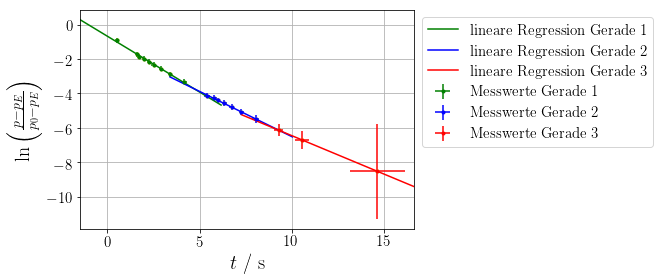

In [62]:
ptKurveTurbo(p_T, p0T, peT, t_1T, t_2T, t_3T, t_4T, t_5T, t_6T, VT)

# Bestimmung des Saugvermögens über die Leckrate

## Für die Drehschieberpumpe

In [34]:
Leckrate(pD1, p_gD1, 0.2, t1D1, t2D1, t3D1, VD, "0.1mbar-D")
Leckrate(pD2, p_gD2, 0.2, t1D2, t2D2, t3D2, VD, "0.4mbar-D")
Leckrate(pD3, p_gD3, 0.2, t1D3, t2D3, t3D3, VD, "0.6mbar-D")
Leckrate(pD4, p_gD4, 0.2, t1D4, t2D4, t3D4, VD, "0.8mbar-D")
Leckrate(pD5, p_gD5, 0.2, t1D5, t2D5, t3D5, VD, "1.0mbar-D")

Druck p[mbar] = [ 0.2  0.4  0.6  0.8  1. ]
Fehler vom Druck perr = [ 0.04  0.08  0.12  0.16  0.2 ]
Mittelwert der Zeit t[s] = [  11.667   46.667   94.667  141.     177.   ] [ 0.333  0.333  0.333  0.577  1.155]
Parameter a und b = [ 0.00480392  0.14874101]  +-  [ 0.00018332  0.00978724]
Saugvermögen S[l/s] = 0.403528922717 +- 0.0887769129526476
 
Druck p[mbar] = [ 0.6  0.8  1.   2.   4. ]
Fehler vom Druck perr = [ 0.12  0.16  0.2   0.4   0.8 ]
Mittelwert der Zeit t[s] = [  6.667  14.333  20.     50.667  99.   ] [ 0.333  0.333  0.     0.333  0.577]
Parameter a und b = [ 0.03417526  0.34329266]  +-  [ 0.00192513  0.03709504]
Saugvermögen S[l/s] = 0.717680369871 +- 0.16066690077448498
 
Druck p[mbar] = [ 0.8  1.   2.   4.   6. ]
Fehler vom Druck perr = [ 0.16  0.2   0.4   0.8   1.2 ]
Mittelwert der Zeit t[s] = [  4.      7.333  24.667  54.     81.   ] [ 0.     0.333  0.333  1.155  0.577]
Parameter a und b = [ 0.06420441  0.5296581 ]  +-  [ 0.00221964  0.03178888]
Saugvermögen S[l/s] = 0.89

## Für die Turbopumpe

In [63]:
Leckrate(pT1, p_gT1, 0.1, t1T1, t2T1, t3T1, VT, "5mbar-T")
Leckrate(pT2, p_gT2, 0.1, t1T2, t2T2, t3T2, VT, "10mbar-T")
Leckrate(pT3, p_gT3, 0.1, t1T3, t2T3, t3T3, VT, "15mbar-T")
Leckrate(pT4, p_gT4, 0.1, t1T4, t2T4, t3T4, VT, "20mbar-T")

Druck p[mbar] = [ 0.0002  0.0004  0.0006  0.0008  0.001   0.002   0.003   0.004   0.005 ]
Fehler vom Druck perr = [  2.00000000e-05   4.00000000e-05   6.00000000e-05   8.00000000e-05
   1.00000000e-04   2.00000000e-04   3.00000000e-04   4.00000000e-04
   5.00000000e-04]
Mittelwert der Zeit t[s] = [  1.633   4.9     8.033  10.933  14.8    28.4    41.167  52.333  63.4  ] [ 0.088  0.1    0.145  0.203  0.3    0.624  1.099  1.244  1.277]
Parameter a und b = [  6.89105021e-05   7.65460994e-05]  +-  [  2.33829762e-06   1.49946816e-05]
Saugvermögen S[l/s] = 11.3013223425 +- 1.534598719013826
 
Druck p[mbar] = [ 0.0002  0.0004  0.0006  0.0008  0.001   0.002   0.004   0.006   0.008 ]
Fehler vom Druck perr = [  2.00000000e-05   4.00000000e-05   6.00000000e-05   8.00000000e-05
   1.00000000e-04   2.00000000e-04   4.00000000e-04   6.00000000e-04
   8.00000000e-04]
Mittelwert der Zeit t[s] = [  0.233   1.033   2.333   3.5     5.6    10.967  20.9    30.033  37.   ] [ 0.033  0.067  0.067  0.058  0.153